# The Influence of Multidimensional Socioeconomic Characteristics of on Wards’ Crime Rates in London

# 1 Introduction

With the rise in crime rates across the Western world, crime research has evolved from a marginal topic to an independent field of study (Duxbury, 2023). Data show that the crime rate in London increased from 83.3 crimes per 1000 people in 2020 to 105.8 crimes per 1000 people in 2023 (Clark, 2024), consistently exceeding the average for England & Wales (e.g., 89.7 crimes per 1000 people in 2023) (Statista Research Department, 2024). Moreover, the distribution of crime rates across London is uneven (Greater London Authority, 2021). Understanding the factors influencing crime rates is crucial for formulating effective urban management policies and enhancing residents' sense of security (John and Stelios, 2016). This study aims to explore how the socioeconomic characteristics of London's wards affect crime rates and to investigate whether key influencing factors can be identified through data dimensionality reduction and feature selection methods. 

In [1]:
# Impot libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from sklearn.preprocessing import StandardScaler

# 2 Literature review

## 2.1 Relationship between crime rate and socioeconomic features

Previous studies have shown that socioeconomic characteristics play a significant role in explaining crime rates. Weatherburn and Rahman (2021) speculate that the factors influencing the decline in Australia's crime rate may include changes in socio-economic factors such as deepening aging, increasing immigration, decreasing alcohol consumption, and economic development. Taking the demographic age structure as an example, theft, robbery, and assault crimes are concentrated in the ages of 15-22, and a declining proportion of the population in this age group may contribute to a decline in crime rates (Weatherburn and Rahman, 2021). Hannon (2005) also gives an example of a correlation between the spatial distribution of crime rates and socio-economic characteristics: areas with extreme poverty have unusually high crime rates compared to areas with moderate and low poverty rates. 

## 2.2 Review of methodologies of past researches on crime rate’s influencing factors

Ordinary Least Squares (OLS) is a common analysis method of the linear relationship between crime rate and its influencing factors. Principal Component Analysis (PCA) as a descending dimension method and Random Forest (RF) as a feature selection method are effective ways to identify key factors influencing crime rates. 

Azfar and Gurgur (2005) use OLS to quantify the linear relationship between crime rates and influencing factors such as governance, literacy and urbanization rates. Wafula, Wanyonyi and Muchwanju (2019) use PCA to reduce the data dimension when statistically analyzing the causes of crime in Masare slum in Nairobi County, and the results show that five PCs could explain 94.8% of the causes of crime. Wang, Hu, Shen, Zhuang and Ni (2020) select an Extremely-randomized Trees (Extra-trees) method, which is also a bagged decision tree model like RF, to estimate and display the feature importance of the city index data that may affect the crim.


## 2.3 Research gaps

The selected socioeconomic indicators are incomplete. For example, Zhou, Wang and Zhou (2023) choose socioeconomic indicators that have been proven to have an impact on crime rates. This approach would limit the possibility of finding other potential socioeconomic characteristics that may influence crime rates. 

Although there is a lot of research on urban crime, there is less specific research on different parts of London (such as the ward level). 

There is a lack of systematic comparative studies to assess the comparative advantages of data reduction and feature selection methods in identifying crime influencing factors.  


# 3 Research question

How do the multidimensional socioeconomic characteristics of London's wards influence crime rates, and can data dimensionality reduction techniques like PCA, alongside feature selection methods such as RF, effectively identify the key factors driving these crime rates? 

# 4 Presentation of data

## 4.1 Data source

The dataset selected for this paper is ward profiles and atlas data published by Geater London Authority in 2021. A ward is an administrative unit one level below borough. The data was collected from 2011 to 2015. 

In [2]:
# Import dataset
London_ward = pd.read_csv('https://raw.githubusercontent.com/uny96/resubmission_006/main/ward-profiles-excel-version.csv')

## 4.2 Data structure

### 4.2.1 Observation units and data volume

In [3]:
# View dataset
print(London_ward)

                                 Ward name Old code   New code  \
0                           City of London     00AA  E09000001   
1             Barking and Dagenham - Abbey   00ABFX  E05000026   
2            Barking and Dagenham - Alibon   00ABFY  E05000027   
3         Barking and Dagenham - Becontree   00ABFZ  E05000028   
4    Barking and Dagenham - Chadwell Heath   00ABGA  E05000029   
..                                     ...      ...        ...   
655                         Waltham Forest     00BH  E09000031   
656                             Wandsworth     00BJ  E09000032   
657                            Westminster     00BK  E09000033   
658                                 London        H  E12000007   
659                                England      921  E92000001   

     Population - 2015  Children aged 0-15 - 2015  Working-age (16-64) - 2015  \
0                 8100                        650                        6250   
1                14750                       

The data set has 660 rows and 67 columns. Each row of data represents a London ward. 

### 4.2.2 Variable description

In [4]:
# View column names and data types
London_ward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 67 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Ward name                                                                    660 non-null    object 
 1   Old code                                                                     660 non-null    object 
 2   New code                                                                     660 non-null    object 
 3   Population - 2015                                                            660 non-null    int64  
 4   Children aged 0-15 - 2015                                                    660 non-null    int64  
 5   Working-age (16-64) - 2015                                                   660 non-null    int64  
 6   Older people aged 65+ - 2015              

The first three columns are of type object, and others are of type numeric.

Columns 0-2 is ward information. 'Old code' and 'New code' are the old and new geocoding systems for the UK Office for National Statistics.

Columns 3, 12-13 are the population, area and population density data of the region respectively.

Columns 4-11 describe the age of the regional population.

Columns 14-16 describe identity backgrounds such as ethnicity. 'BAME' stands for Black, Asian and Minority Ethnic.

Columns 17-19 describe birth rates and life expectancy.

Columns 20-24 data on health and safety.

Columns 25-29 are related to employment. Columns 48-50 relate to the employment status of the child's parents.

Columns 30-43 are housing-related data. Council tax is divided into grades A to H, with 'Band A' being the cheapest and 'Band H' the most expensive.

Columns 44-47 are litigation-related data.

Columns 51-52 describe the poverty rate. 'ID' is an acronym for Index of Deprivation. 'LSOA' refers to Lower Super Output Area, which is a small regional unit with a population of around 1500. '(ID2010) % of LSOAs in worst 50% nationally - 2010' describes how many small areas in ward fall within the worst 50% nationally.

Columns 53-58 are related to education.

Columns 59-62 are related to crime.

Columns 63-65 show travel ptterns within the region.


## 4.3 Data Validation and Cleaning

### 4.3.1 Select rows

According to 'Ward name' column, the data set includes ward, borough and country level areas. Only Ward level areas are used in this study. In combination with the columns 'Ward name' and 'Old code', Ward's 'Old code' is a 6-bit code consisting of 2 digits and 4 uppercase letters, which is different from borough's and country’s. According to the encoding format of 'Old code', all wards could be filtered out through regular expressions. 

In [5]:
# Select wards
pattern = r'^\d{2}[A-Z]{4}$'
Valid_code=London_ward['Old code'].str.match(pattern)
London_ward=London_ward[Valid_code]
London_ward.shape

(624, 67)

### 4.3.2 Check uniqueness

To ensure that the data is not duplicated, the unique value of the 'Old code' column could be checked.

In [6]:
# Check unique value
unique_counts = London_ward['Old code'].nunique()
print("Unique values per column:")
print(unique_counts)

Unique values per column:
624


### 4.3.3 Select columns

'Ward name', 'Old code' and 'New code' are unique identifiers and are not suitable as variables.

Since ‘Crime rate - 2014/15’ is selected as the target variable and ‘Violence against the person rate - 2014/15’ and  'Deliberate Fires per 1,000 population 2014' are variables that also measure crime, so they cannot be used as input variables.

In [7]:
# Select columns
columns_to_drop = ['Ward name', 'Old code', 'New code', 'Violence against the person rate - 2014/15', 'Deliberate Fires per 1,000 population - 2014']
London_ward_columns_selected = London_ward.drop(columns=columns_to_drop)

### 4.3.4 Find and replace missing values

In [8]:
# Find missing values and sort by size
nan_check=London_ward_columns_selected.isna()
nan_count_per_column = nan_check.sum()
nan_count_sorted = nan_count_per_column.sort_values(ascending=False)
print("Number of NaN values per column (sorted):")
print(nan_count_sorted)

Number of NaN values per column (sorted):
% children in reception year who are obese - 2011/12 to 2013/14    17
% children in year 6 who are obese- 2011/12 to 2013/14             12
Employment per head of resident WA population - 2013                2
Number of jobs in area - 2013                                       2
Population - 2015                                                   0
                                                                   ..
Median House Price (? - 2014                                        0
Number of properties sold - 2014                                    0
Median Household income estimate (2012/13)                          0
Number of Household spaces - 2011                                   0
Turnout at Mayoral election - 2012                                  0
Length: 62, dtype: int64


The data contains some missing values, and this article uses the average of the columns in which the missing values reside instead.

In [9]:
# Replace missing values
London_ward_filled = London_ward_columns_selected.apply(lambda x: x.fillna(x.mean()), axis=0)
London_ward_filled.to_csv('London_ward_filled.csv', index=False)

### 4.3.5 Statistical description (Find and remove abnormal values)

In [10]:
# Summary
summary=London_ward_filled.describe().round(2)
summary=summary.T
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
summary

,count,mean,std,min,25%,50%,75%,max
Population - 2015,624.0,13822.84,2901.37,5300.0,11650.00,13600.00,15712.50,26700.0
Children aged 0-15 - 2015,624.0,2767.31,873.93,750.0,2150.00,2650.00,3300.00,6450.0
Working-age (16-64) - 2015,624.0,9483.73,2259.70,3050.0,7750.00,9400.00,10950.00,21750.0
Older people aged 65+ - 2015,624.0,1572.04,523.81,600.0,1200.00,1450.00,1800.00,3600.0
% All Children aged 0-15 - 2015,624.0,19.82,3.74,6.5,17.68,19.75,22.20,32.7
% All Working-age (16-64) - 2015,624.0,68.38,5.10,57.4,64.50,67.30,71.90,83.9
% All Older people aged 65+ - 2015,624.0,11.79,4.27,3.7,8.40,11.10,14.40,24.3
Mean Age - 2013,624.0,35.95,3.07,28.7,33.70,35.50,38.00,44.3
Median Age - 2013,624.0,34.47,3.95,27.0,32.00,34.00,37.00,46.0
Area - Square Kilometres,624.0,2.55,2.58,0.4,1.20,1.90,2.90,29.0


In [11]:
# Restore display settings
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In 'Summary', there are eight columns where the maximum value of the data is much larger than the 75% percentile, so there may be outliers. To visualize the columns,  histogram and box plot are used. 

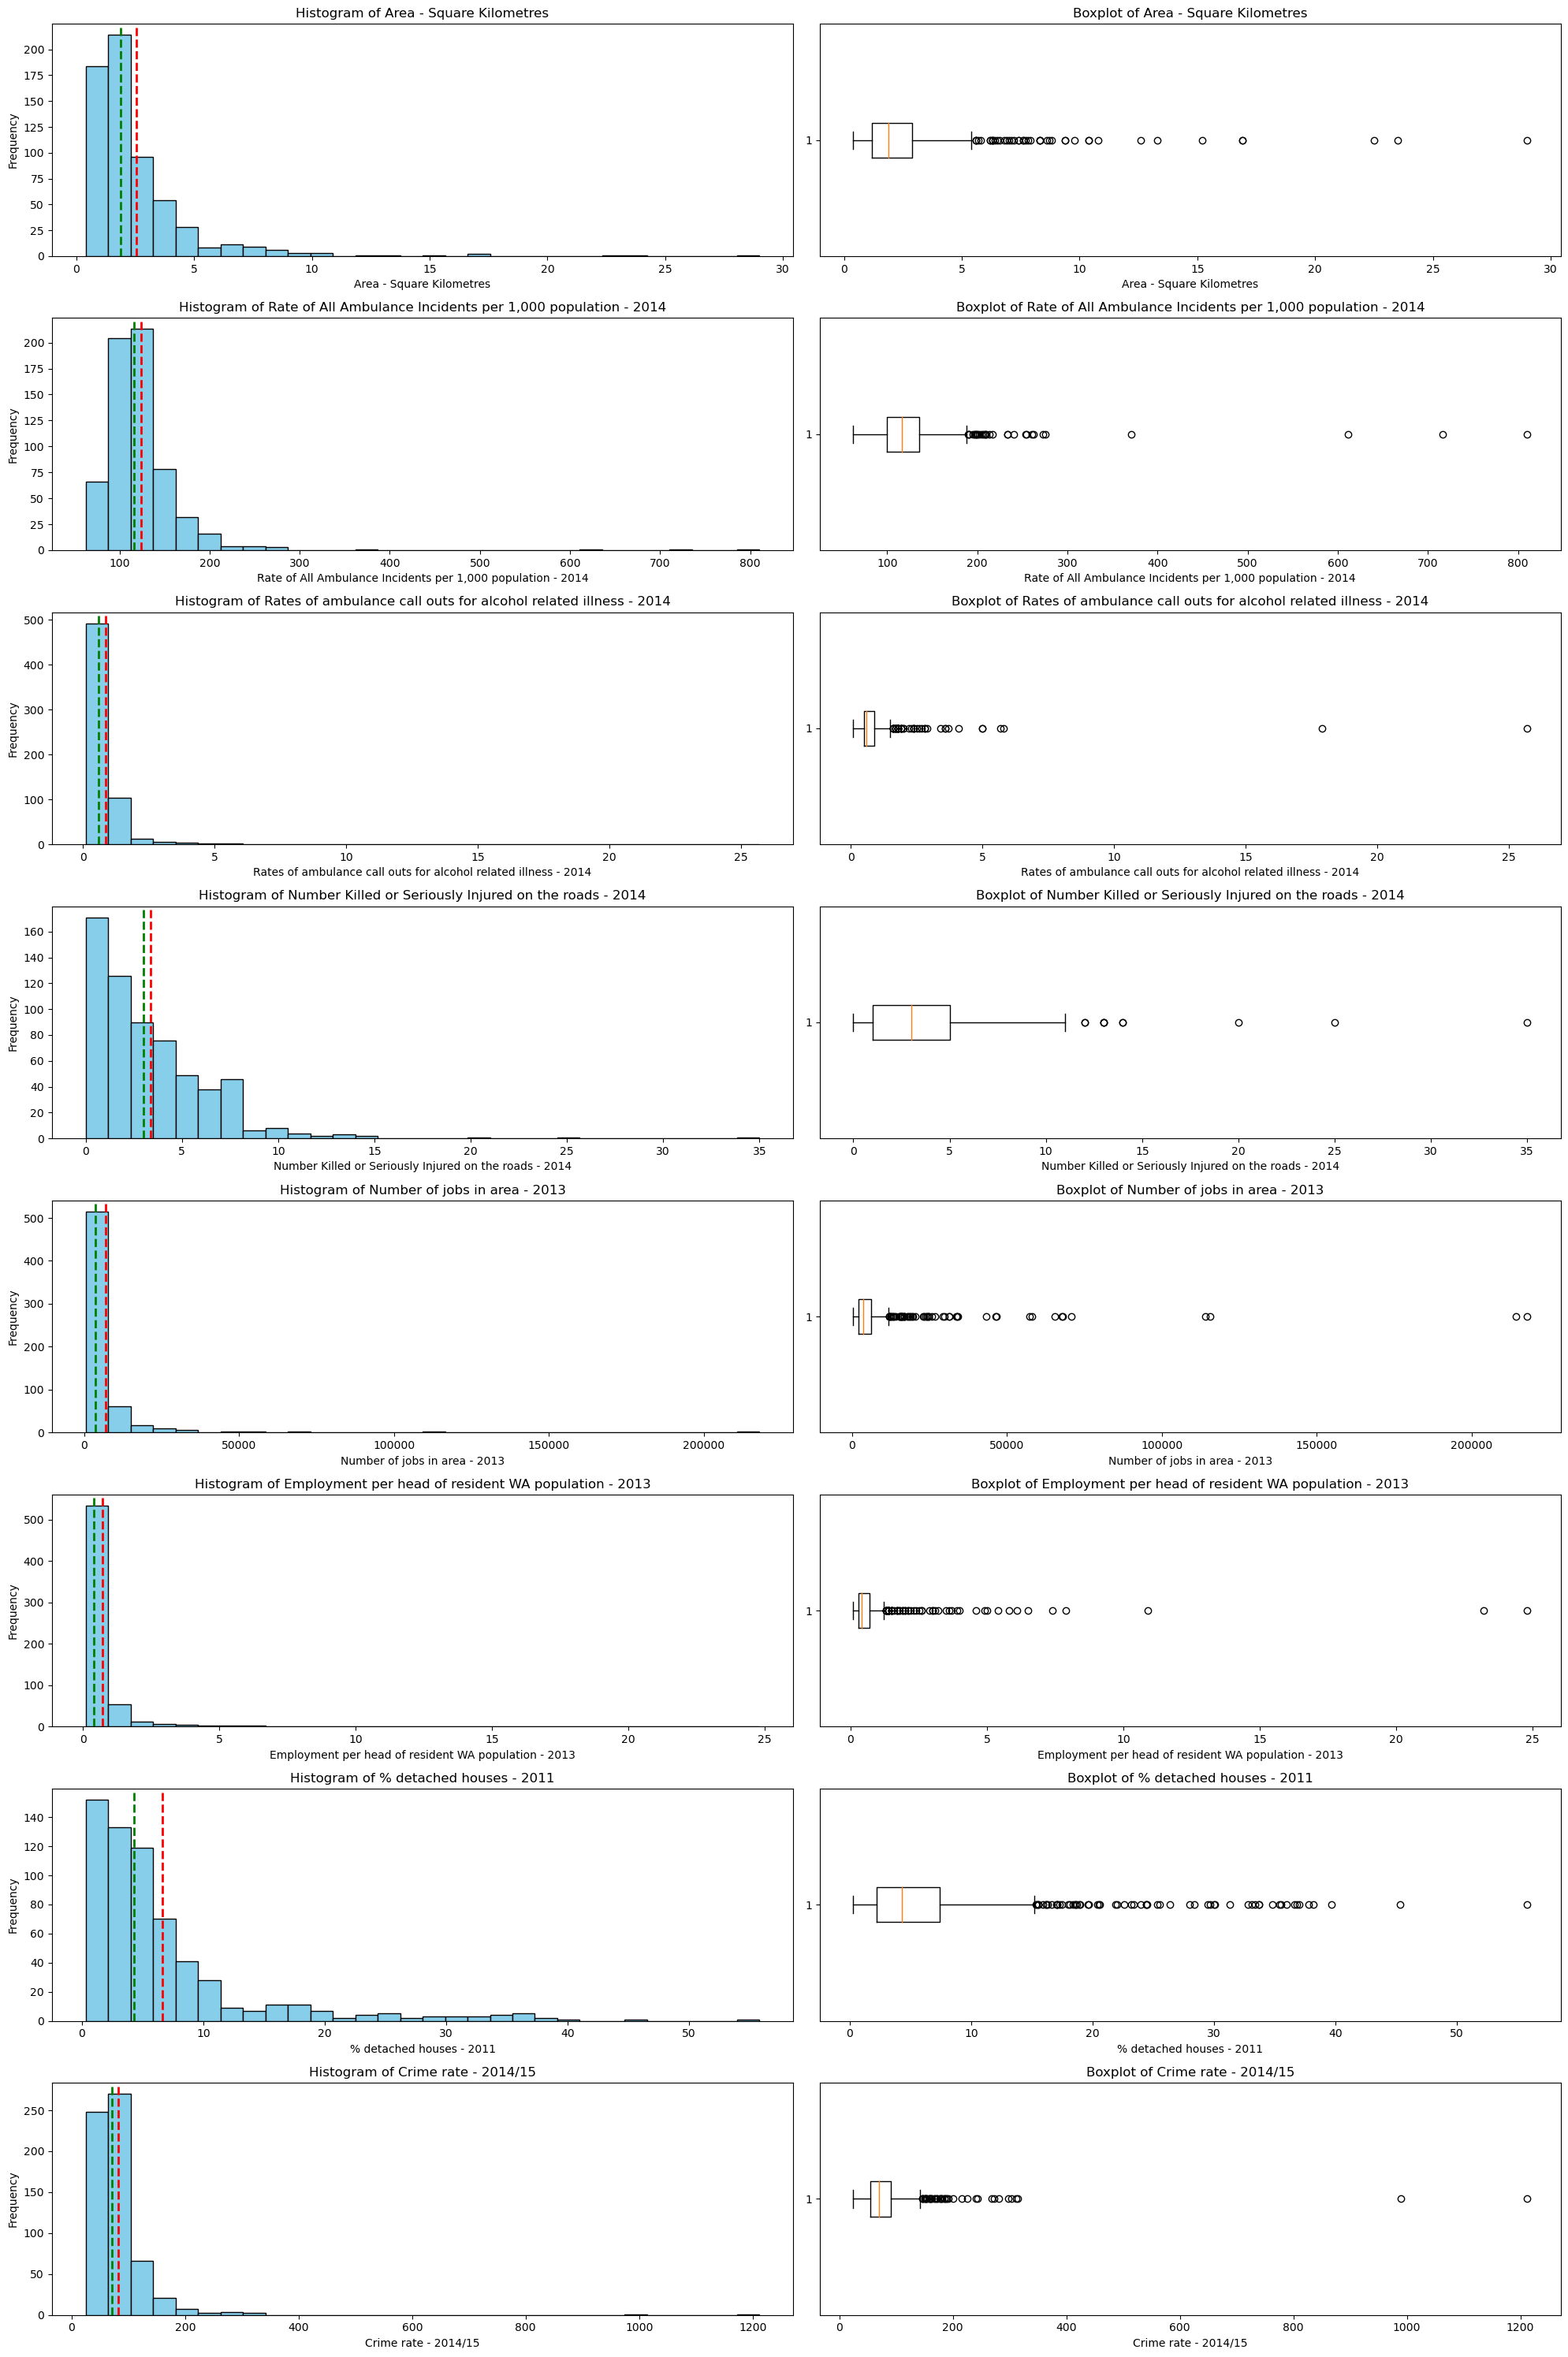

In [12]:
# Plot histograms and boxplots
columns_to_check = [
    'Area - Square Kilometres',
    'Rate of All Ambulance Incidents per 1,000 population - 2014',
    'Rates of ambulance call outs for alcohol related illness - 2014',
    'Number Killed or Seriously Injured on the roads - 2014',
    'Number of jobs in area - 2013',
    'Employment per head of resident WA population - 2013',
    '% detached houses - 2011',
    'Crime rate - 2014/15'
]

plt.figure(figsize=(20, 30))  

for i, column in enumerate(columns_to_check):
    plt.subplot(len(columns_to_check), 2, 2*i + 1)  
    plt.hist(London_ward_filled[column], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(London_ward_filled[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(London_ward_filled[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(len(columns_to_check), 2, 2*i + 2)  
    plt.boxplot(London_ward_filled[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

They all have problems of right-skew distribution and large outliers. The code below removes most outliers. As for the problem of right skew distribution of data, it will be alleviated by normalization in the data pre-processing stage.

In [13]:
# Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
for column in columns_to_check:
    London_ward_filled = remove_outliers(London_ward_filled, column)
London_ward_filled.shape

(522, 62)

102 rows of data are removed by filtering outliers.

### 4.3.6 Data correlation analysis

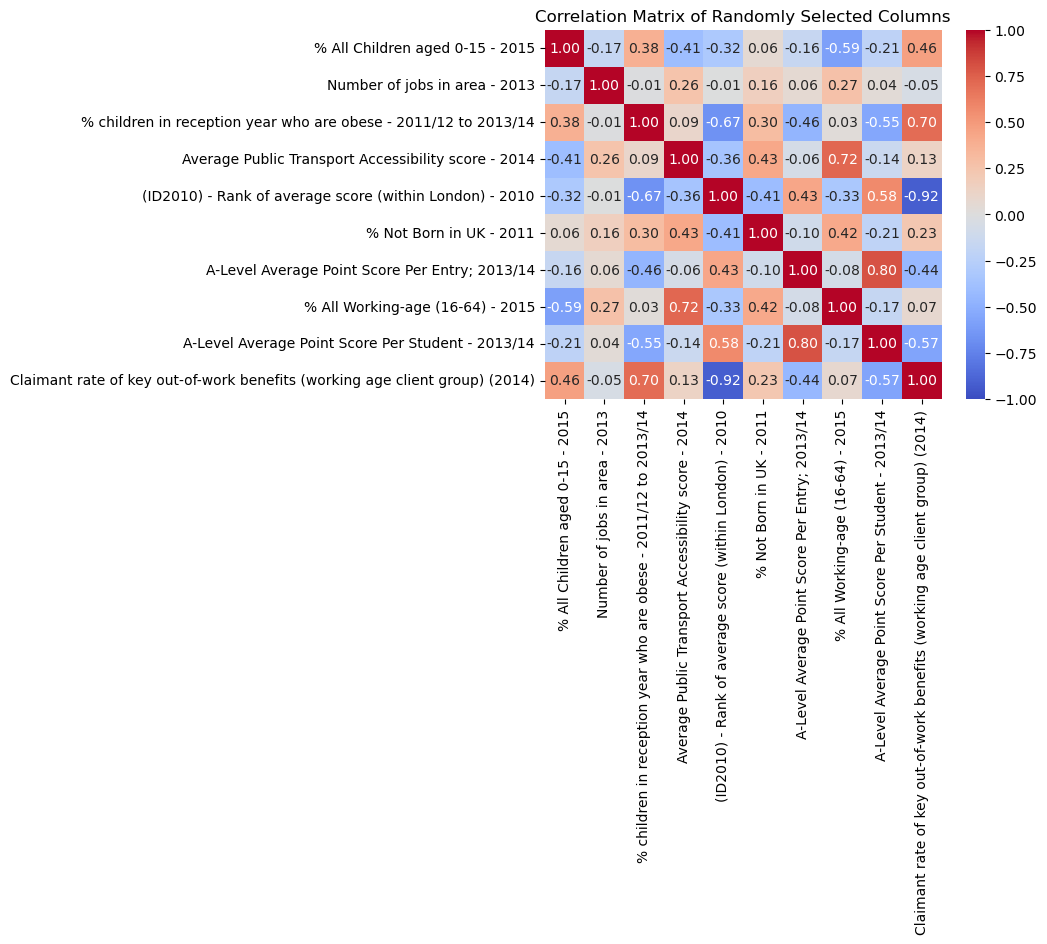

In [14]:
np.random.seed(20)
selected_columns = np.random.choice(London_ward_filled.columns, 10, replace=False)
data_subset = London_ward_filled[selected_columns]
corr_matrix = data_subset.corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1)
plt.title('Correlation Matrix of Randomly Selected Columns')
plt.show()

The correlation matrix is drawn by randomly selecting 10 columns of data. There are highly positive (0.8) or negative (-0.92) correlated variables. 

Multicollinearity can have a negative effect on linear regression. PCA can effectively solve this problem.

# 5 Methodology and result

The foremost principal components after PCA dimensionality reduction are used as independent variables, the crime rate in London is used as dependent variable, and OLS is used for a regression analysis. This paper will also use the two features that have the greatest impact on the crime rate selected by RF as independent variables, and the crime rate in London as dependent variables, and use OLS to conduct another regression analysis. Finally, this paper will evaluate and compare the effects of the two OLS models through residual analysis. 

## 5.1 Data Pre-processing

### 5.1.1 Data dimension reduction by PCA

PCA is a dimensionality reduction technique that can extract the most important information from a data set, reduce data dimensions, and mitigate multicollinearity (Abdi, and Williams, 2010). 

In [15]:
# Independent variables, dependent variables and name list of independent variables
X = London_ward_filled.drop('Crime rate - 2014/15', axis=1).values
list_var_X = London_ward_filled.columns.tolist()
list_var_X.remove('Crime rate - 2014/15')
y = London_ward_filled.loc[:,['Crime rate - 2014/15']].values

In [16]:
# Data dimension reduction
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_new_components = pca.fit_transform(X_normalized)
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,Mean Age - 2013,Median Age - 2013,Area - Square Kilometres,...,Unauthorised Absence in All Schools (%) - 2013,% with no qualifications - 2011,% with Level 4 qualifications and above - 2011,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
0,-0.107799,-0.117771,-0.119942,0.117166,-0.079065,-0.079437,0.169705,0.181021,0.178789,0.061945,...,-0.152268,-0.096719,0.062228,0.139418,0.106007,0.035280,0.162182,-0.084035,-0.042484,0.110371
1,0.002625,-0.106749,0.072069,-0.114245,-0.191574,0.236231,-0.103917,-0.032156,-0.061010,-0.152830,...,-0.053946,-0.240232,0.270004,0.048810,0.057893,-0.104172,-0.175892,0.232472,0.197882,0.129509
2,0.387700,0.298554,0.350276,0.170205,0.070412,0.009688,-0.078078,-0.086927,-0.078295,0.193637,...,-0.003415,-0.076802,0.016574,0.052900,0.078462,0.040927,0.068802,-0.064942,-0.135070,-0.017022
3,-0.046835,0.054161,-0.056649,-0.120267,0.128124,-0.029029,-0.085711,-0.121485,-0.132511,-0.162879,...,-0.048282,-0.070621,0.004258,0.064342,0.078232,-0.130440,0.042709,-0.012237,-0.128803,0.010069
4,-0.052554,-0.013964,-0.086432,0.104306,0.005457,-0.119431,0.137963,0.091507,0.044040,0.190904,...,0.055300,0.033016,-0.033277,0.029868,0.006918,0.190568,0.032006,0.050430,-0.130704,-0.072145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.009322,-0.006265,-0.014452,0.026714,-0.002270,0.004487,-0.008071,-0.004069,-0.002032,0.004916,...,0.003950,0.002255,0.012406,-0.000278,0.000242,0.000802,-0.007359,0.006910,-0.011959,0.000189
57,0.752217,-0.232532,-0.574057,-0.119103,0.050799,0.066031,0.047093,-0.001095,-0.000354,-0.002187,...,-0.000163,0.000157,-0.001264,0.000692,0.000013,0.001444,-0.002712,-0.000679,-0.000248,0.000633
58,-0.133346,0.040269,0.104072,0.019645,0.065095,0.080287,0.070740,0.004715,-0.005283,-0.000606,...,0.000423,-0.004237,-0.008229,0.000304,0.000083,-0.000916,-0.002895,0.001366,0.000417,0.001289
59,-0.055172,0.017707,0.042760,0.008505,0.504305,0.649434,0.546724,-0.004907,0.000330,0.000376,...,-0.000387,0.000928,0.002469,-0.000486,0.000449,-0.000075,0.004482,0.000640,0.000244,-0.000736


When using PCA dimensionality reduction techniques, researchers can rely on the explained variance to determine the number of components included in subsequent analyses (Brown, 2009). 

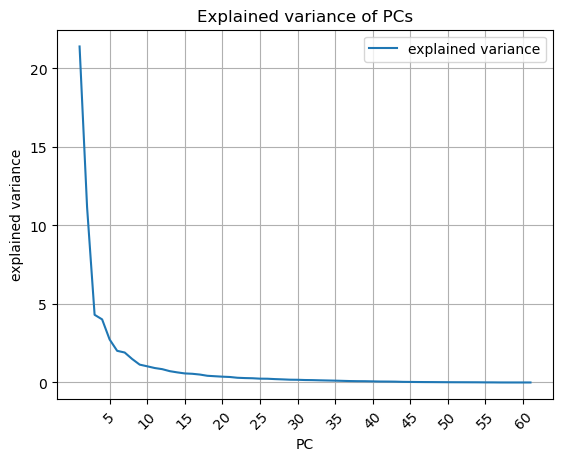

In [17]:
# Explained variance of PCs
df_EV = pd.DataFrame({'explained variance': pca.explained_variance_,
                   'PC': list(range(1, pca.n_components_ + 1))})
ax = df_EV.plot.line(x='PC', y='explained variance')
ax.set_xticks(df_EV['PC'][df_EV['PC'] % 5 == 0]) 
ax.set_xticklabels(df_EV['PC'][df_EV['PC'] % 5 == 0], rotation=45)
plt.xlabel('PC')
plt.ylabel('explained variance')
plt.title('Explained variance of PCs')
plt.grid(True)
plt.show()

Explained variance represents the variance explained by each principal component (Chouinard, 2023). The greater the explained variance, the more information is retained (Chouinard, 2023). Drawing a line chart of the explained variance, PC=3 is a transition point, so PC1, PC2 and PC3 will be selected for regression analysis. 

In [18]:
# create a new dataset including the two PCs and target variable
X_pc = X_new_components[:,[0, 1, 2]]
dataset = np.column_stack((X_pc, London_ward_filled['Crime rate - 2014/15']))
dataset_df = pd.DataFrame(dataset, columns=['PC1', 'PC2', 'PC3', 'Crime rate - 2014/15'])
print(dataset_df[:5])

        PC1       PC2       PC3  Crime rate - 2014/15
0 -6.151119  0.881272  1.032260                 138.1
1 -3.923232 -5.611082 -3.688464                  73.6
2 -3.902507 -4.746142 -1.725543                  79.9
3 -2.349165 -5.497791 -2.809732                  76.1
4  0.401102 -5.341972 -2.160687                  66.7


In [19]:
# Normalize data
scaler = MinMaxScaler()
Normalized = scaler.fit_transform(dataset_df)
Normalized_df = pd.DataFrame(Normalized, columns=dataset_df.columns)
print(Normalized_df)

          PC1       PC2       PC3  Crime rate - 2014/15
0    0.200664  0.451245  0.548946              0.723514
1    0.304996  0.067607  0.176265              0.306848
2    0.305967  0.118717  0.331229              0.347545
3    0.378710  0.074302  0.245637              0.322997
4    0.507506  0.083509  0.296876              0.262274
..        ...       ...       ...                   ...
517  0.495654  0.664232  0.209399              0.212532
518  0.217467  0.404303  0.151141              0.233204
519  0.568402  0.690612  0.446661              0.261628
520  0.575420  0.772030  0.078416              0.204134
521  0.184321  0.484842  0.208287              0.319121

[522 rows x 4 columns]


### 5.1.2 Random forest for feature ranking

RF is a popular supervisory model method for feature selection. RF calculate feature importance based on the ability of features to increase leaf purity: the higher the purity of a leaf, the higher the feature importance (Malato, 2021). 

In [20]:
# Split train and test set
train_x, test_x, train_y, test_y = train_test_split(London_ward_filled.drop(['Crime rate - 2014/15'], axis=1), 
                                                    London_ward_filled['Crime rate - 2014/15'],
                                                    test_size=0.2, random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(417, 61)
(417,)
(105, 61)
(105,)
True
True


In [21]:
# Cross validation
param_grid = {'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': range(1, 5)}
grid_search = GridSearchCV(RandomForestRegressor(n_estimators=50, random_state=20), param_grid, n_jobs=-1)
grid_search.fit(train_x, train_y)
print(f"optimal parameter: {grid_search.best_params_}")
print(f"score of optimal parameter: {grid_search.best_score_}")

optimal parameter: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
score of optimal parameter: 0.6640192264903856


In [22]:
# Train random forest
optimal_params = grid_search.best_params_
op_model = RandomForestRegressor(**optimal_params, random_state=20)
op_model.fit(train_x, train_y)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=20)

In [23]:
# Calculate R Square and RMSE
print("R2 on the training data:")
print(op_model.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(op_model.score(X=test_x, y=test_y))
print("RMSE on the training data:")
print(mean_squared_error(train_y, op_model.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, op_model.predict(test_x), squared=False))

R2 on the training data:
0.9080948629659359
R2 on the testing data:
0.654460939233402
RMSE on the training data:
7.677350531636386
RMSE on the testing data:
16.634036806778756


In [24]:
# Importance ranking of features
result = permutation_importance(op_model, test_x, test_y, n_repeats=20, random_state=20)
feature_importances = pd.DataFrame(result.importances_mean, index=test_x.columns, columns=['Importance'])
print(feature_importances.sort_values(by='Importance', ascending=False).head(5))

                                                    Importance
% Households Owned - 2011                             0.231647
Rates of ambulance call outs for alcohol relate...    0.153018
Number of jobs in area - 2013                         0.116852
Rate of All Ambulance Incidents per 1,000 popul...    0.049865
(ID2010) - Rank of average score (within London...    0.022486


The importance of '% Households Owned - 2011', 'Rates of ambulance call outs for alcohol related illness - 2014' and 'Number of jobs in area - 2013' is 23.1%, 15.3% and 11.7% respectively, ranking among the top three and far exceeding the importance of other features. Therefore, these three variables will be used for regression analysis.

In [25]:
# Select columns and normalize data for OLS
dataset_RF = London_ward_filled[['Rates of ambulance call outs for alcohol related illness - 2014', '% Households Owned - 2011', 'Number of jobs in area - 2013', 'Crime rate - 2014/15']]
scaler = MinMaxScaler()
Normalized1 = scaler.fit_transform(dataset_RF)
Normalized_df1 = pd.DataFrame(Normalized1, columns=['Alcohol_illness', 'Households_owned', 'Job', 'Crime'])
print(Normalized_df1.head())

   Alcohol_illness  Households_owned       Job     Crime
0         0.631579          0.270130  0.545455  0.723514
1         0.421053          0.431169  0.030303  0.306848
2         0.263158          0.451948  0.048485  0.347545
3         0.368421          0.546753  0.084848  0.322997
4         0.315789          0.723377  0.212121  0.262274


## 5.2 Comprehensive Analysis - Linear regression by OLS

Linear regression needs to satisfy the assumptions of independence, non-collinearity, homoscedasticity, and residual normality to produce reliable results (Maitra, 2023). There is no dependency between the observations used in this paper. PCA circumvents the problem of multicollinearity. The multicollinearity of model based on result of RF is examined below by constructing a correlation matrix using the main features selected by RF. Homoscedasticity is checked by plotting a scatter plot of the residuals and fitted values. The normality of the residuals is checked by plotting the residuals histogram and Q-Q plot.

### 5.2.1 OLS based on result of PCA

In [26]:
# OLS based on result of PCA
model = ols('Q("Crime rate - 2014/15") ~ PC1 + PC2 + PC3', data=Normalized_df).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Q("Crime rate - 2014/15")   R-squared:                       0.467
Model:                                   OLS   Adj. R-squared:                  0.464
Method:                        Least Squares   F-statistic:                     151.0
Date:                       Mon, 26 Aug 2024   Prob (F-statistic):           2.53e-70
Time:                               11:11:59   Log-Likelihood:                 354.59
No. Observations:                        522   AIC:                            -701.2
Df Residuals:                            518   BIC:                            -684.2
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

The model can explain 46.7% of the crime rate in London. PC1 and PC3 are negatively correlated with the crime rate (coefficient is -0.45 and -0.01, respectively), while PC2 is positively correlated with the crime rate (coefficient is 0.31). PC1 and PC2 have a greater impact on the crime rate in London, while PC3 has a smaller impact.

In [27]:
# Features contrubte to PC1 and PC2
loadings = pca.components_.T
feature_names = df_PrincipleComp.columns
pc1_loadings = loadings[:, 0]
pc1_loadings_df = pd.DataFrame(pc1_loadings, index=feature_names, columns=['PC1 Loadings'])
top_5_features = pc1_loadings_df.nlargest(10, 'PC1 Loadings')
print(top_5_features)

pc2_loadings = loadings[:, 1]
pc2_loadings_df = pd.DataFrame(pc2_loadings, index=feature_names, columns=['PC2 Loadings'])
top_5_features = pc2_loadings_df.nlargest(10, 'PC2 Loadings')
print(top_5_features)

                                                    PC1 Loadings
(ID2010) - Rank of average score (within London...      0.204349
% Households Owned - 2011                               0.182635
Mean Age - 2013                                         0.181021
Median Age - 2013                                       0.178789
% All Older people aged 65+ - 2015                      0.169705
Employment rate (16-64) - 2011                          0.166807
Cars per household - 2011                               0.162182
Male life expectancy -2009-13                           0.152101
Average GCSE capped point scores - 2014                 0.148733
Median Household income estimate (2012/13)              0.148500
                                                    PC2 Loadings
% with Level 4 qualifications and above - 2011          0.270004
% Flat, maisonette or apartment - 2011                  0.237655
% All Working-age (16-64) - 2015                        0.236231
Average Public Transport 

The variables with high contribution to PC1 are mainly related to economic level, age and employment rate. The variables with high contribution to PC2 are mainly related to education, housing and travel mode. 

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


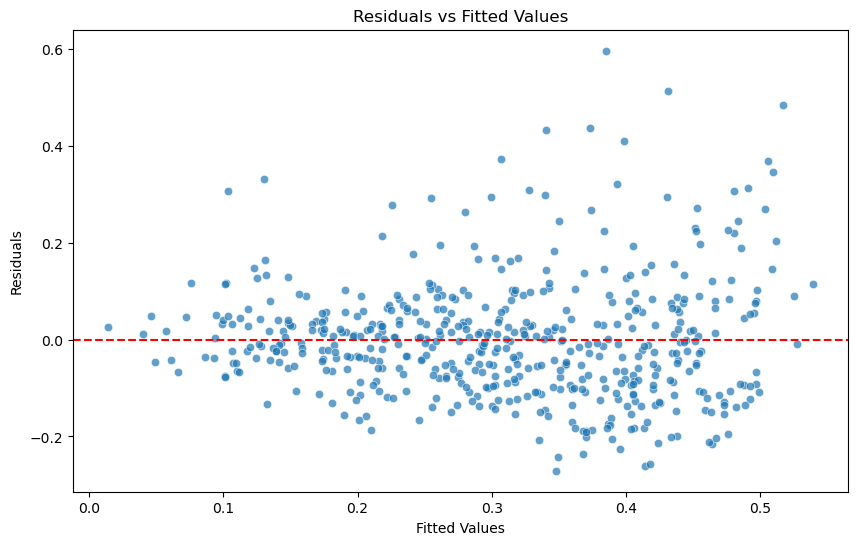

In [28]:
# Scatter plot of residuals according to fitted values
fitted_values = model.fittedvalues
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The residual is basically uniform and randomly distributed, satisfying homoscedasticity hypothesis.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


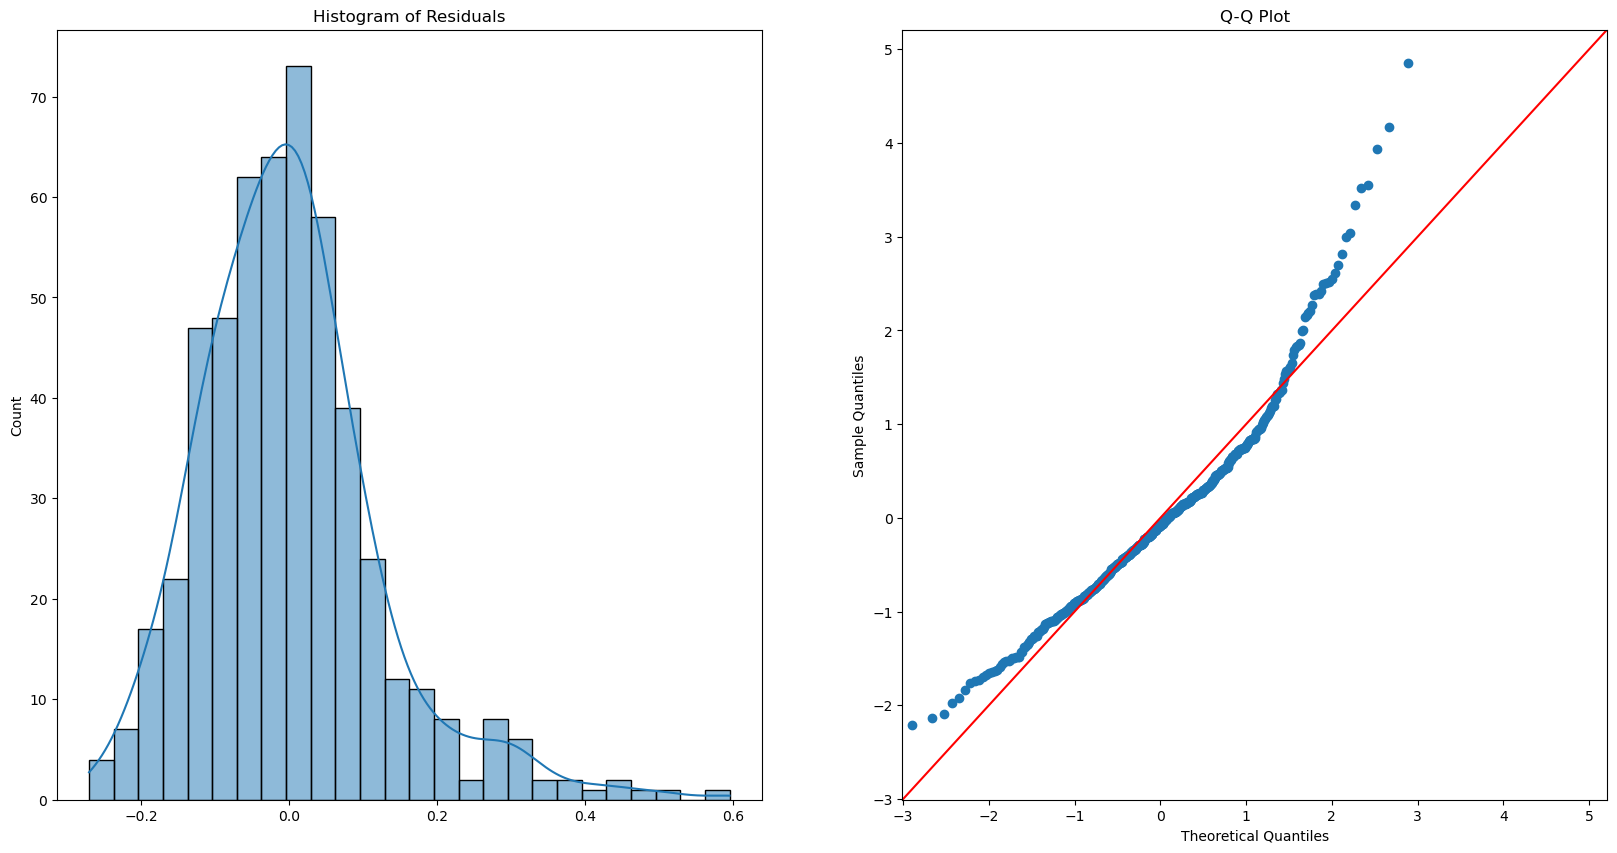

In [29]:
# Diagnose normal distribution of residuals
residuals = model.resid 
plt.rcParams["figure.figsize"] = [20, 10]
f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) 
axes[0].set_title('Histogram of Residuals') 
sm.qqplot(residuals, line='45', fit=True,  ax=axes[1])
axes[1].set_title('Q-Q Plot')
plt.show()

The residuals basically satisfy the normal distribution. 

### 5.2.2 OLS based on result of RF

Text(0.5, 1.0, 'Correlation Matrix')

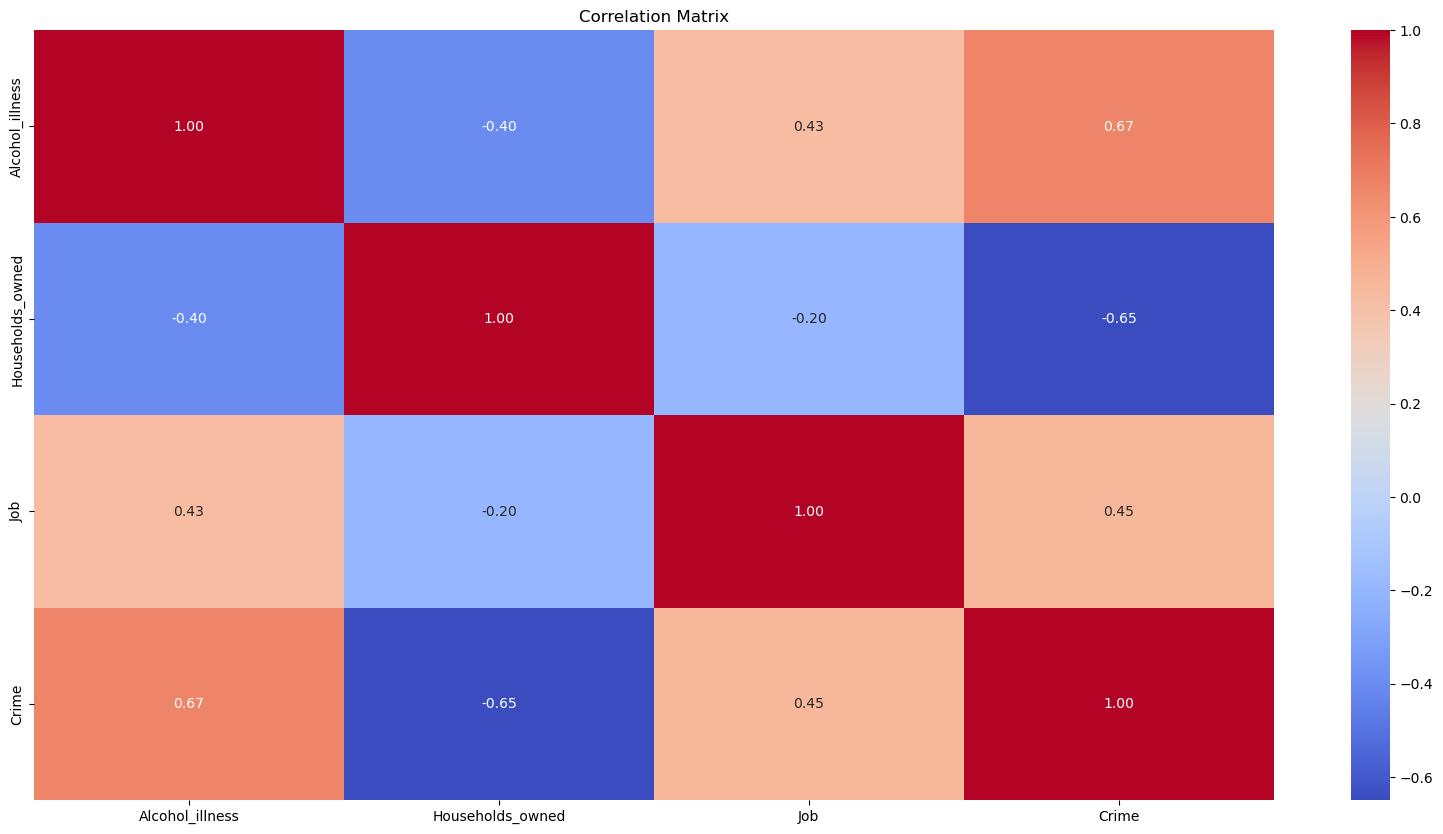

In [30]:
# Plot a correlation matrix 
sns.heatmap(Normalized_df1.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')
plt.title('Correlation Matrix') 

The correlation rates of 'Rates of ambulance call outs for alcohol related illness' and the other two variables are 0.40 and 0.43, which are in the medium range and may slightly affect the accuracy and interpretability of the model.

In [31]:
# OLS based on result of RF
model1 = ols('Crime ~ Alcohol_illness + Households_owned + Job', data=Normalized_df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     318.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          3.84e-117
Time:                        11:12:00   Log-Likelihood:                 463.39
No. Observations:                 522   AIC:                            -918.8
Df Residuals:                     518   BIC:                            -901.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3057      0.016  

The model can explain 64.8% of London's crime rate. 'Rates of ambulance call outs for alcohol related illness' and 'Number of jobs' are positively correlated with crime rate (coefficient: 0.40 and 0.18, respectively). '% Households Owned - 2011' has a negative correlation with the crime rate (coefficient: -0.33). 'Job number' matters less relatively.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


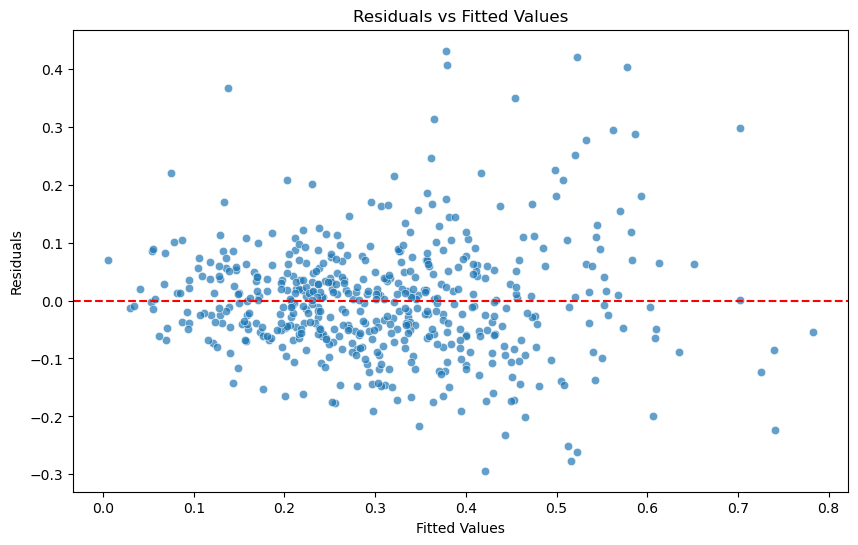

In [32]:
# Scatter plot of residuals according to fitted values
fitted_values1 = model1.fittedvalues
residuals1 = model1.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values1, y=residuals1, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

It satisfies homoscedasticity hypothesis.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


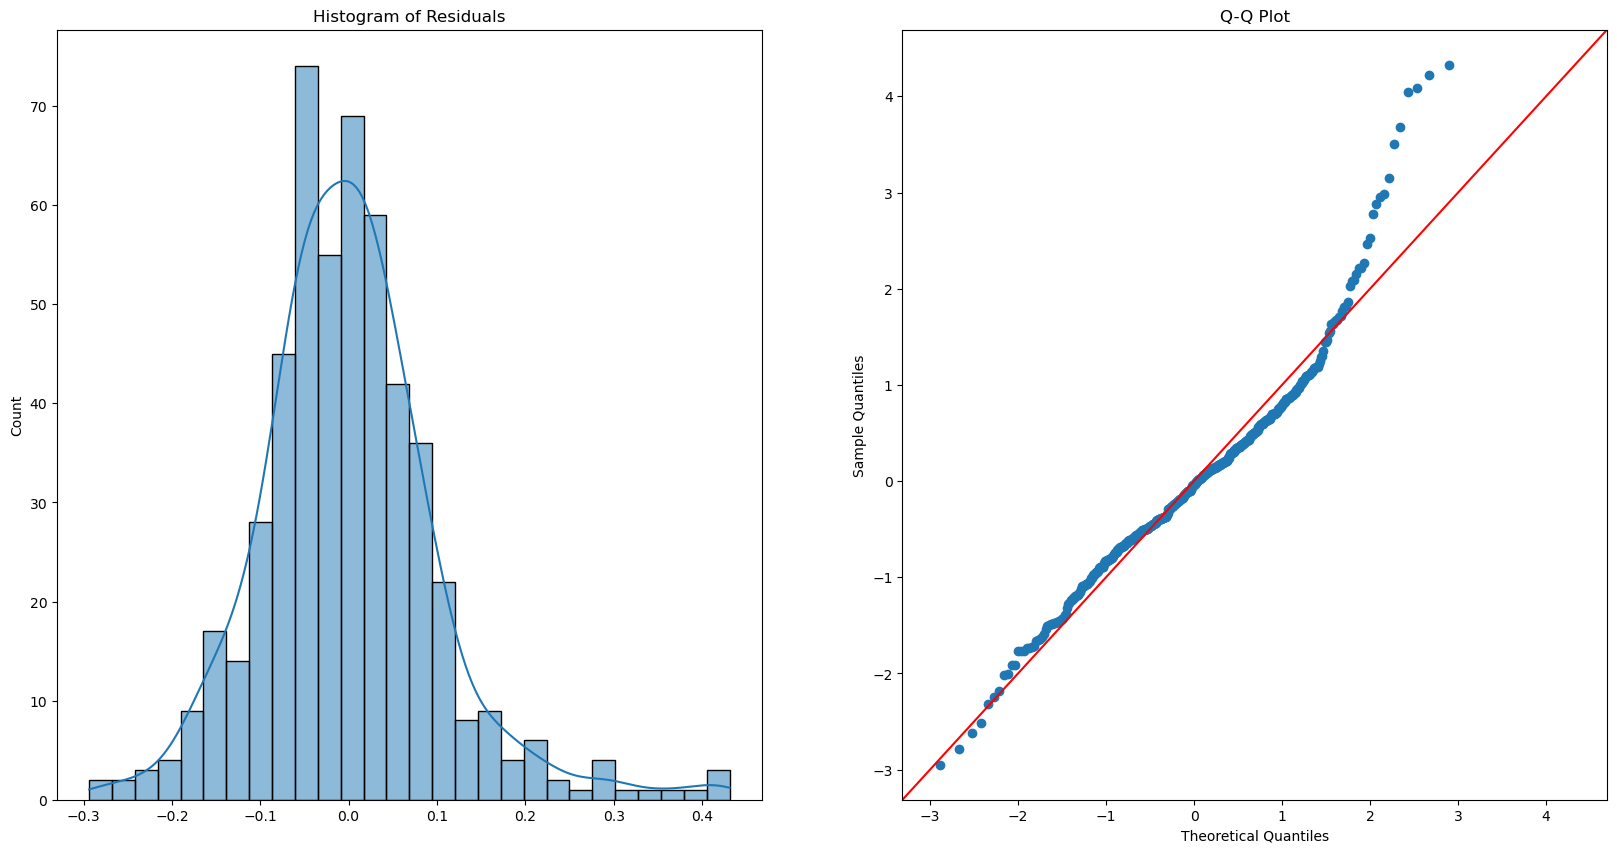

In [33]:
# Diagnose normal distribution of residuals
residuals1 = model1.resid 
plt.rcParams["figure.figsize"] = [20, 10]
f, axes = plt.subplots(1, 2)
sns.histplot(residuals1, kde=True, ax=axes[0]) 
axes[0].set_title('Histogram of Residuals') 
sm.qqplot(residuals1, line='45', fit=True,  ax=axes[1])
axes[1].set_title('Q-Q Plot')
plt.show()

Residuals are roughly normal distribution.

# 6 Discussion and conclusion

According to the OLS model based on PCA results and the main components of PC1 and PC2, the model can explain 46.7% of the dependent variable changes, and it is inferred that the crime rate in London may be negatively correlated with economic level, average age and employment rate, and may be positively correlated with education level, housing level, public transport accessibility and bicycle usage. The reliability of result is limited due to the relatively weak interpretation of data dimensionality reduction. According to the OLS model based on RF results, which can explain 64.8% of the variation in the dependent variable, alcohol consumption and the number of jobs may be positively correlated with crime in London, and home ownership may be negatively correlated with crime. The mild correlation may have limited negative effect on reliability of result.

One limitation of this research is that the time of data collection is not uniform (ranging from 2011 to 2015).  


# 7 Reference

Reference
Abdi, H., and Williams, L. J. (2010) ‘Principal component analysis’, Wiley Interdisciplinary Reviews: Computational Statistics, 2(4), pp.433-459. 

Azfar, O and Gurgur, T. (2005) ‘Government effectiveness, crime rates and crime reporting’, available at: https://ssrn.com/abstract=72368 (Accessed from: 17 August 2024). 

Brown, J. (2009) 'Choosing the right number of components of factors in PCA and EFA', Shiken: JALT Testing & Evaluation SIG Newsletter, 13(2), pp.19-23, available at: https://teval.jalt.org/test/bro_30.htm (Accessed from: 25 August 2024). 

Chouinard, J. (2023) 'What is the explained variance in PCA (Python Example)?', available at: https://www.jcchouinard.com/pca-explained-variance/ (Accessed from: 25 August 2024). 

Clark, D. (2024) ‘Crime rate in London 2015-2024’, available at: https://www.statista.com/statistics/380963/london-crime-rate/ (Accessed from: 17 August 2024). 

Duxbury, S. (2023) ‘The past and present of crime research in social forces: how the sociology of crime lost its roots—and found them again.’, Social Forces, 101 (4), pp.1609–1622, available at: https://web-p-ebscohost-com.libproxy.ucl.ac.uk/ehost/pdfviewer/pdfviewer?vid=0&sid=70568d2f-3bec-4f32-8701-4bf6d3fa39ee%40redis (Accessed from: 17 August 2024). 

Greater London Authority (2021) ‘Ward Profiles and Atlas’, available at: https://www.data.gov.uk/dataset/c7869dd4-7a05-4d5d-9e42-bdfc8da8c1b7/ward-profiles-and-atlas (Accessed from: 17 August 2024). 

Hannon, L. (2005) ‘Extremely poor neighborhoods and homicide’, Social Science Quarterly, 86(1), pp.1418-1434, available at: https://doi.org/10.1111/j.0038-4941.2005.00353.x (Accessed from: 17 August 2024).

John, B. and Stelios, T. (2016) ‘Factors influencing crime rates: an econometric analysis approach’, Signal Processing, Sensor/Information Fusion, and Target Recognition XXV, 9842, available at: https://doi.org/10.1117/12.2223395 (Accessed from: 17 August 2024). 

Maitra, M. (2023) 'Assumptions in regression: why, what, and how', available at: https://www.dataversity.net/assumptions-in-regression-why-what-and-how/ (Accessed from: 26 August 2024). 

Malato, G. (2021) 'Feature selection with random forest', available at: https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/ (Accessed from: 26 August 2024). 

Statista Research Department (2024) ‘UK crime rate by country 2002-2024’, available at: https://www.statista.com/statistics/1030625/crime-rate-uk/ (Accessed from: 17 August 2024). 

Wafula, E., Wanyonyi, W. and Muchwanju, C. (2019) ‘Application of principal component analysis to crime data, case study: Mathare slums, Nairobi country in Kenya’, American Journal of Theoretical and Applied Statistics, 8(1), pp.7-17, available at: http://erepository.uoeld.ac.ke/handle/123456789/643 (Accessed from: 17 August 2024). 

Wang, J., Hu, J., Shen, S., Zhuang, J. and Ni, S. (2020) ‘Crime risk analysis through big data algorithm with urban metrics’, Physica A: Statistical Mechanics and its Applications, 545, pp.378-4371, available at: https://doi.org/10.1016/j.physa.2019.123627 (Accessed from: 17 August 2024). 
.
Weatherburn, D. and Rahman, S. (2021) ‘Explanations for the crime drop: a first pass’, The Vanishing Criminal: Causes of Decline in Australia’s Crime Rate, pp. 37-72, Melbourne: Melbourne University Publishing Ltd., available at: https://doi.org/10.2307/jj.1176875.5 (Accessed from: 17 August 2024). 

Zhou, Y., Wang, F. and Zhou, S. (2023) ‘The spatial patterns of the crime rate in London and its socio-economic influence factors’, Social Sciences, 12(6), p.340, available at: https://doi.org/10.3390/socsci12060340 (Accessed from: 17 August 2024). 
